# 主成分分析

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 訓練データ生成

In [21]:
mean = [0, 0]
cov = [[2, 1], [1, 1.5]]
pca_X = np.random.multivariate_normal(mean, cov, 300)
my_X = pca_X

(-5, 5)

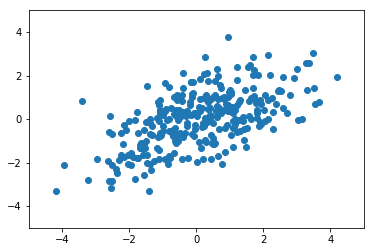

In [23]:
plt.scatter(my_X[:, 0], my_X[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 学習

訓練データ$X = [\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, ..., \boldsymbol{x}_{n}]^{\mathrm{T}}$に対して$\mathbb{E}[\boldsymbol{x}] = \boldsymbol{0}$となるように変換する。

すると、不偏共分散行列は$Var[\boldsymbol{x}] = \frac{1}{n-1} X^{\mathrm{T}}X$と書ける。

$Var[\boldsymbol{x}]$を固有値分解し、固有値の大きい順に対応する固有ベクトルを第1主成分($\boldsymbol{w}_{1}$), 第2主成分($\boldsymbol{w}_{2}$), ...とよぶ。

In [24]:
n_components=2
pca = PCA(n_components=2)
pca.fit(pca_X)

print('components')
print(pca.components_)
print('mean')
print(pca.mean_)
print('covariance')
print(pca.get_covariance())

components
[[-0.79230085 -0.61013061]
 [-0.61013061  0.79230085]]
mean
[0.09133716 0.00271853]
covariance
[[2.25369878 1.14916093]
 [1.14916093 1.6463656 ]]


In [36]:
mean = my_X.mean(axis=0)
z = my_X - mean

cv = np.cov(z[:,0],z[:,1],bias=0)
cov1 = np.cov(my_X - mean, rowvar=False)
cov = np.dot((my_X- mean).T, my_X - mean) / (len(my_X) - 1)
print('mean')
print(mean)
print('covariance')
print(cv)
print(cov)
print(cov1)

eigenvalues, eigenvectors = np.linalg.eigh(cov)
W = eigenvectors[:, -n_components:]

principal_components = W.T[::-1]

[[ 1.81667559 -0.12297726]
 [ 0.95232521  1.23371662]
 [-0.77006578 -1.58002104]
 [ 0.20483384  1.08146286]
 [-3.05221723 -1.82777135]
 [-2.47039321 -2.49864339]
 [ 0.25800021  0.45273425]
 [ 0.33347964  0.15198141]
 [-1.19608043  0.62296106]
 [-0.51738684  0.8425323 ]
 [ 0.49548526  0.38508455]
 [ 1.01392235  0.28724398]
 [-1.23234515 -0.81701084]
 [-0.65013617 -0.06070476]
 [ 0.75034572 -1.49443706]
 [-1.46674476 -0.66908622]
 [ 1.13666763  2.38293827]
 [ 0.00470984  0.3528608 ]
 [-1.67280222 -1.38967611]
 [ 0.85865278  0.36470332]
 [ 0.42821656 -1.17151058]
 [ 2.44905614  1.3114583 ]
 [-1.42308829 -0.72888761]
 [-0.69675731 -1.11471558]
 [ 1.60889579  2.84528204]
 [ 0.21005181 -1.05036861]
 [-0.13368886 -0.26960062]
 [ 2.95436988 -0.04118626]
 [-1.64642408 -0.49410863]
 [-1.87125413  0.30740472]
 [ 1.31260775 -0.08527603]
 [ 1.21241517 -0.54891139]
 [ 2.20508158  0.31168281]
 [-0.84056946  0.50712831]
 [ 0.80325534  0.69904517]
 [ 1.82653331 -0.24219268]
 [ 0.25746831  0.77957977]
 

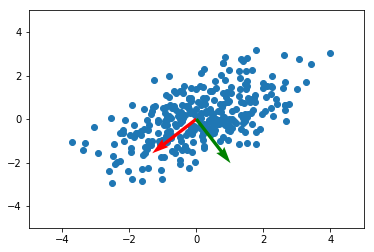

In [24]:
first, second = principal_components

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
# 第１主成分
plt.quiver(0, 0, first[0], first[1], width=0.01, scale=6, color='red')
# 第２主成分
plt.quiver(0, 0, second[0], second[1], width=0.01, scale=6, color='green')

## 変換（射影）

元のデータを$m$次元に変換(射影)するときは行列$W$を$W=[\boldsymbol{w}_{1}, \boldsymbol{w}_{2}, \cdots, \boldsymbol{w}_{m}]$とし、データ点$\boldsymbol{x}$を$\boldsymbol{z} = W^{\mathrm{T}} \boldsymbol{x}$
によって変換(射影)する。

よって、データ$X$に対しては$Z = X^{\mathrm{T}}W$によって変換する。

In [6]:
Z = np.dot(X - mean, W)

(-5, 5)

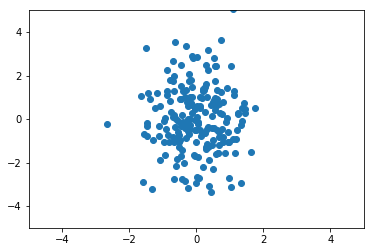

In [7]:
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 逆変換

射影されたデータ点$\boldsymbol{z}$を元のデータ空間へ逆変換するときは$\bar{\boldsymbol{x}} = (W^{\mathrm{T}})^{-1} \boldsymbol{z} = W \boldsymbol{z}$によって変換する。

よって、射影されたデータ$Z$に対しては$\bar{X} = ZW^{\mathrm{T}}$によって変換する。

In [8]:
X_ = np.dot(Z, W.T) + mean

(-5, 5)

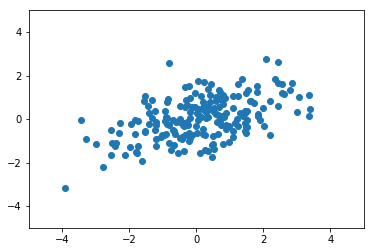

In [9]:
plt.scatter(X_[:, 0], X_[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)